In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['Ozone']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [8]:
forest = RandomForestRegressor(n_estimators=2000,
                              max_depth=12,
                              max_features='auto',
                              min_samples_split=3,
                              min_samples_leaf=2,random_state=50)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=2000, random_state=50)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9131405009549012

Score on test data: 0.7371485999505762

Root Mean Squared Error: 11.856191150512531

Overall model accuracy: 0.7371485999505762


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([20.20174308, 20.9969038 , 22.29353045, 19.27876397, 19.65582107,
       20.6485962 , 22.29483636, 40.6866012 , 42.58437469, 43.39530247,
       49.07612271, 53.35396378, 55.71627542, 54.40905547, 56.01282023,
       55.00777455, 56.34629127, 56.02955604, 54.14962815, 55.58825655,
       60.46899168, 58.51289074, 53.79612225, 52.70737745, 55.89654048,
       31.1543454 , 32.72079383, 31.00415248, 30.19635439, 30.54127231,
       32.35424131, 31.05529541, 31.5436785 , 29.96977858, 33.82791023,
       34.32802344, 33.17518871, 31.96843948, 34.93323076, 36.04334819,
       37.15244088, 33.95260856, 30.68293763, 30.83179637, 32.76794988,
       32.66745868, 31.01226836, 29.06570013, 29.34440116, 28.88603565,
       27.58723854, 19.18335865])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

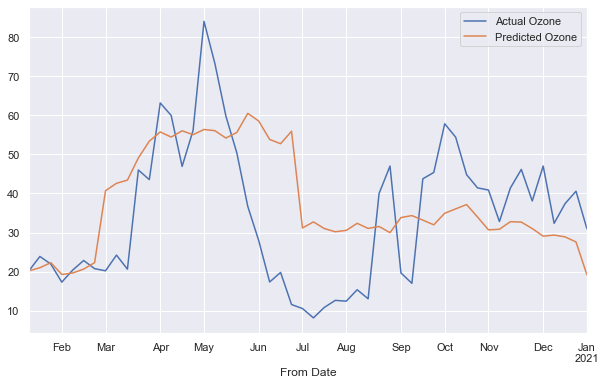

In [17]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')
plt.style.use('seaborn-white')

In [18]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 9.055993077224658
MSE: 140.56926859749166
RMSE: 11.856191150512531
R-Squared: 0.7371485999505762


In [19]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.452618572518556
MSE: 278.62044698613664
RMSE: 16.69192759947564
R-Squared: 0.09952694735824497


In [20]:
import pickle
filename = 'Ozone_model.sav'
pickle.dump(forest, open(filename, 'wb'))
 

In [21]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']

In [22]:
pred.median()

54.40905546946528

In [23]:
ytest.std()

23.283296842649

In [24]:
pred1=X.loc["2020-04-15":"2020-05-17",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-01-30":"2020-03-22",'pred']
pred2.median()

32.510849991651334

# 3rd plot

In [25]:
testcase = pd.DataFrame()

In [26]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [27]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [28]:
testcase

,test,pred,Corrected
365,28.570000,19.627512,31.483703
116,86.474286,79.836284,91.692475
61,70.641429,64.219821,76.076012
325,52.700000,52.569333,64.425524
100,80.438571,58.960441,70.816632
...,...,...,...
249,45.662857,38.069849,49.926040
351,31.645714,35.093093,23.236902
27,29.760000,35.105803,23.249612
19,79.041429,71.643243,83.499435


In [29]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [30]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.880995326347328

In [31]:
test2020=pd.DataFrame()

In [32]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [33]:
test2020.index=test.index

In [34]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

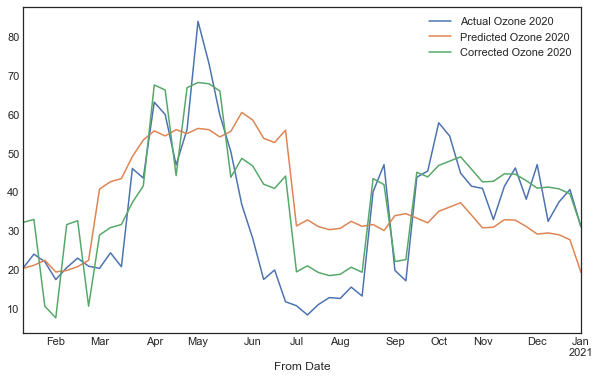

In [35]:
test2020['test'].plot(legend=True, label='Actual Ozone 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone 2020')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone 2020')

In [36]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5591459698816137

In [37]:
ytest.std()

23.283296842649

In [38]:
test2020['test'].std()

17.76183027109344